## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

##**Supervised Learning:**
In the Supervised Learning we are having both independent variable and dependent variable.There are two types of problem we found out in Supervised Learning 
<br>
i). Classification  ii). Regression

### Author: Xaltius Pte. Ltd.
Copyright Xaltius Pte. Ltd., 2018

**Not for distribution.**

__Loading Libraries__

In [ ]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

__Getting Data__

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##**Pearsons Correlation**

In [ ]:
# how to find between columns correlated:  https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(data['Hours'], data['Scores'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.976


**Observation**:- We can see that there is perfect correlation between Hours and Scores..



__Data Visualization__

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

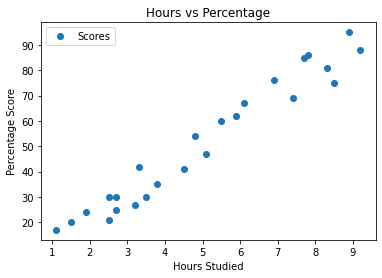

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. This is not perfectly Linear but It is over lapping some where.**

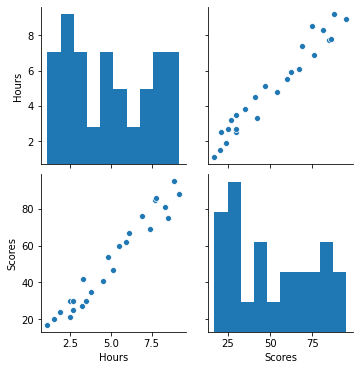

In [ ]:
import seaborn as sns
sns.pairplot(data)

##**Box-plot for Visualization**:

With the help of this diagram we can see that if there is any outlier or not in given variables.


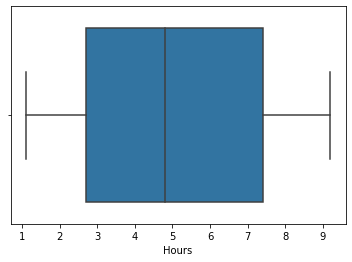

In [ ]:
ax = sns.boxplot(x=data["Hours"])

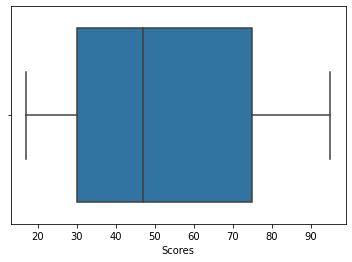

In [ ]:
ax = sns.boxplot(x=data["Scores"])

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

##**Linear Regression Model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


###Visualizing Data Model

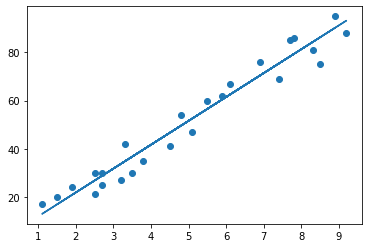

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
print("Actual Data")
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print("Prediction Completed")

Actual Data
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Prediction Completed


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
# You can also test with your own data
n=float(input(print("Enter no. of Hours")))
own_pred = regressor.predict([[n]])
print("No of Hours = {}".format(n))
print("Predicted Score = {}".format(own_pred[0]))

Enter no. of Hours
5
No of Hours = 5.0
Predicted Score = 51.57144244464586


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


**Observation**: This is Regression Problem for which we are using Linear Regression Model to get better result. Our MSE is 4.18